# PHASE 3 PROJECT

## Project Overview
Customer satisfaction is a critical aspect in the airline industry that quickly and directly impacts customer retention or customer drop off. The company has observed a rise in the number of customer drop off and wants to identify what are the key factors leading to such results in order to improve services and increase customer retention. 

The objective of this project is to generate insights for business stakeholders from a classification model that predicts passenger satisfaction or dissatisfaction based on various flight service factors. 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
airline_data = pd.read_csv('Data/airline_passenger_satisfaction.csv')
airline_data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Dropping Unnamed Column
airline_data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
airline_data

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [7]:
airline_data.info()
airline_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

(129880, 23)

In [8]:
airline_data.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
# Checking for missing values by percentage
missing = (airline_data.isnull().sum()/len(airline_data))*100
missing

Gender                               0.000000
customer_type                        0.000000
age                                  0.000000
type_of_travel                       0.000000
customer_class                       0.000000
flight_distance                      0.000000
inflight_wifi_service                0.000000
departure_arrival_time_convenient    0.000000
ease_of_online_booking               0.000000
gate_location                        0.000000
food_and_drink                       0.000000
online_boarding                      0.000000
seat_comfort                         0.000000
inflight_entertainment               0.000000
onboard_service                      0.000000
leg_room_service                     0.000000
baggage_handling                     0.000000
checkin_service                      0.000000
inflight_service                     0.000000
cleanliness                          0.000000
departure_delay_in_minutes           0.000000
arrival_delay_in_minutes          

In [10]:
# Checking for duplicates
airline_data.duplicated().sum()

0

In [11]:
# Filling in for missing values with median
airline_data['arrival_delay_in_minutes'].fillna(airline_data['arrival_delay_in_minutes'].median(), inplace=True)
airline_data['arrival_delay_in_minutes'].isnull().sum()

0

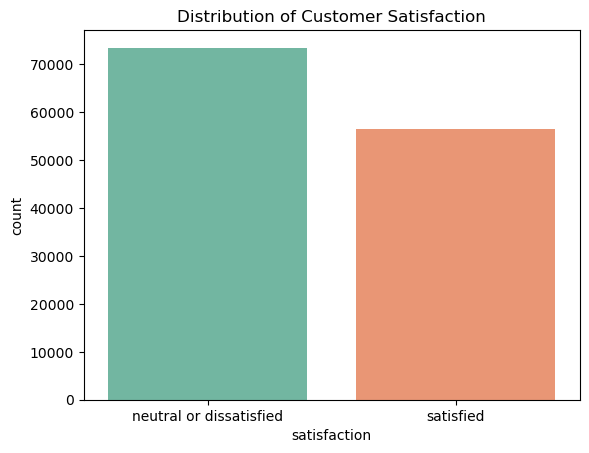

In [14]:
# plt.figure(figsize=(6,4))
sns.countplot(data=airline_data, x='satisfaction', palette='Set2')
plt.title('Distribution of Customer Satisfaction')
plt.show()

In [15]:
X = airline_data.drop(columns=['satisfaction'])
y = airline_data['satisfaction'].apply(lambda x: 1 if x == "satisfied" else 0)

In [16]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [20]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols), ('cat', OneHotEncoder(), categorical_cols)])

lr = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000, random_state=42))])
lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [21]:
dt = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

--- Logistic Regression Evaluation ---
Accuracy: 0.8753
Precision: 0.8712
Recall: 0.8386
F1 Score: 0.8546

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14622
           1       0.87      0.84      0.85     11354

    accuracy                           0.88     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.88      0.88      0.87     25976



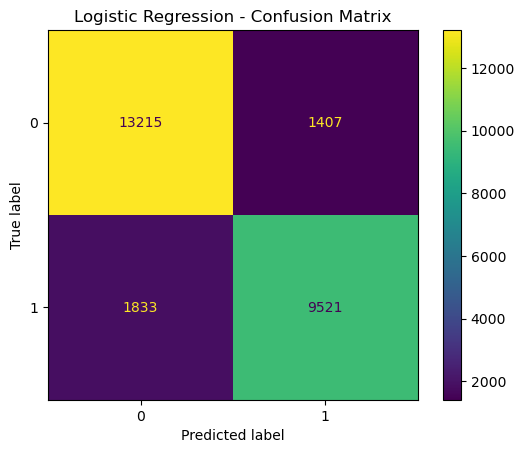

In [47]:
# Evaluate Logistic Regression
evaluate_model(y_test, lr_pred, "Logistic Regression")

--- Decision Tree Evaluation ---
Accuracy: 0.9446
Precision: 0.9381
Recall: 0.9349
F1 Score: 0.9365

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14622
           1       0.94      0.93      0.94     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



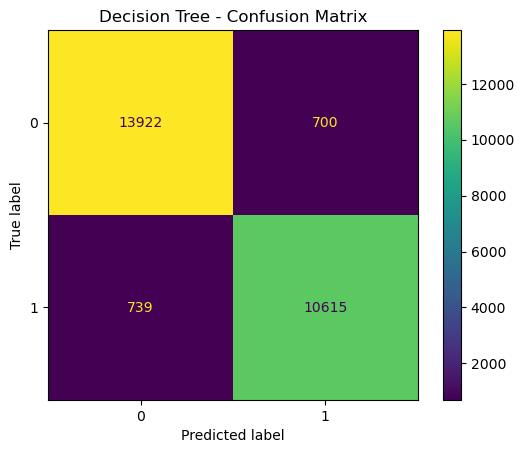

In [48]:
# Evaluate Decision Tree
evaluate_model(y_test, dt_pred, "Decision Tree")